# Machine Learning

Machine Learning is a subset of artificial intelligence that enables systems to learn and improve from experience without being explicitly programmed.

![Machine Learning](machine_learning.png)

*Fig: Visual representation of Machine Learning concepts*

## Why is it used?
- To find patterns in complex data
- Make data-driven predictions
- Automate decision-making processes
- Handle tasks that are too complex for traditional programming

## Common Applications
- Image and Speech Recognition
- Fraud Detection
- Recommendation Systems
- Medical Diagnosis
- Stock Market Prediction
- Natural Language Processing

## Importance after learning Python, Pandas, and NumPy
After mastering Python, Pandas, and NumPy, learning Machine Learning algorithms is crucial because:
1. These tools form the foundation for implementing ML algorithms
2. ML helps transform raw data (managed by Pandas) into actionable insights
3. NumPy's numerical operations are essential for ML computations
4. Real-world problems often require automated learning from data
5. It opens up career opportunities in data science and AI


# Example: Simple Linear Regression

Linear Regression is one of the simplest machine learning algorithms. Here's a basic example:

### Problem: Predicting House Prices
- **Input**: House size (square feet)
- **Output**: House price
- **Goal**: Learn the relationship between size and price



### Code Implementation

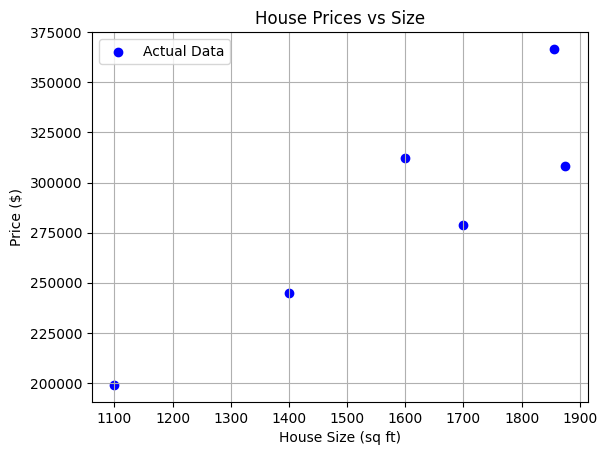

In [16]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Sample data
sizes = np.array([1400, 1600, 1700, 1875, 1100,1855]).reshape(-1, 1)
# Reshape sizes to 2D array (n_samples, n_features) as required by scikit-learn
# -1 means automatically calculate the number of rows needed, 1 specifies one column

prices = np.array([245000, 312000, 279000, 308000, 199000,366668])
import matplotlib.pyplot as plt

# Plot actual data points
plt.scatter(sizes, prices, color='blue', label='Actual Data')


plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('House Prices vs Size')
plt.legend()
plt.grid(True)
plt.show()




In [34]:
without_reshaped = np.array([1400, 1600, 1700, 1875, 1100])
without_reshaped

array([1400, 1600, 1700, 1875, 1100])

In [33]:
aftereshaped = np.array([1400, 1600, 1700, 1875, 1100]).reshape(-1, 1)
aftereshaped

array([[1400],
       [1600],
       [1700],
       [1875],
       [1100]])

In [35]:
# Create and train model
model = LinearRegression()
model.fit(sizes, prices)

LinearRegression()

In [36]:
# Make prediction for a 1500 sq ft house
prediction = model.predict([[1500]])
print('Predicted price for 1500 sq ft house:', prediction[0])


Predicted price for 1500 sq ft house: 269370.726790451


# Plot regression line


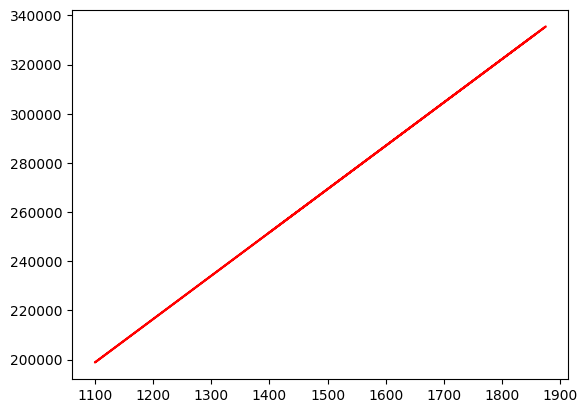

In [37]:
plt.plot(sizes, model.predict(sizes), color='red', label='Regression Line')
plt.show()



### Key Components
1. Data Collection
2. Model Selection
3. Training
4. Prediction
5. Evaluation

This simple example demonstrates core ML concepts:
- Feature selection (input variables)
- Target variable (what we're predicting)
- Training process
- Making predictions with trained model

# Implementing Linear Regression from Scratch

Linear regression can be implemented using basic mathematical operations. The key components are:

## Mathematical Foundation
- **Equation**: y = mx + b
- **m**: slope (coefficient)
- **b**: y-intercept
- **Cost Function**: Mean Squared Error (MSE)

## Steps for Implementation
1. Calculate mean of x and y
2. Calculate slope using the formula:
    m = Σ((x - x̄)(y - ȳ)) / Σ(x - x̄)²
3. Calculate y-intercept:
    b = ȳ - m(x̄)
4. Make predictions using y = mx + b

Our dataset:
- X (House sizes): 1100-1875 sq ft
- Y (Prices): $199,000-$312,000

This implementation helps understand:
- Core mathematical concepts
- Gradient descent alternatives
- Error calculation
- Model optimization

*Compare this with our scikit-learn implementation to see the efficiency of using established libraries.*

In [38]:
! pip install numpy
! pip install pandas
! pip install scikit.learn
! pip install matplotlib

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class CustomLinearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    def fit(self,b, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b =b  # Using existing b variable
        self.X = X
        self.Y = Y
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    
    def predict(self, X):
        return X.dot(self.W) + self.b

def main():
    X = sizes  # Using existing sizes variable
    Y = prices  # Using existing prices variable
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)
    
    model = CustomLinearRegression(iterations=1000, learning_rate=0.01)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    print("Predicted values ", np.round(Y_pred[:3], 2))
    print("Real values     ", Y_test[:3])
    print("Trained W     ", round(model.W[0], 2))
    print("Trained b     ", round(model.b, 2))
    
    plt.scatter(X_test, Y_test, color='blue')
    plt.plot(X_test, Y_pred, color='orange')
    plt.title('House Size vs Price')
    plt.xlabel('House Size (sqft)')
    plt.ylabel('Price')
    plt.show()

if __name__ == "__main__":
    main()


TypeError: CustomLinearRegression.fit() missing 1 required positional argument: 'Y'